<a href="https://colab.research.google.com/github/jx-dohwan/Initial_public_offering_price_prediction/blob/main/C5_0_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# C5.0-LR

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
from scipy.stats import pointbiserialr

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

## 1. 기본 변수

In [4]:
df = pd.read_csv('/content/drive/MyDrive/인공지능/경영빅데이터/data/IPOv3_resampled_data.csv')

In [5]:
df = df.drop(['최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)','최근 3개월 공모주 수', '희망공모가_하한',  '희망공모가_상한','일반청약자(비율)', 'ROE'], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   상장 시기(상장월)         832 non-null    int64  
 1   최근 "따" 비율          832 non-null    float64
 2   공모가                832 non-null    int64  
 3   밴드수익률(공모가/공모가_상한)  832 non-null    float64
 4   기관경쟁률              832 non-null    float64
 5   청약경쟁률              832 non-null    float64
 6   의무보유확약             832 non-null    float64
 7   대표주간사              832 non-null    int64  
 8   IPO 주간사 순위         832 non-null    int64  
 9   총 공모주식 수           832 non-null    int64  
 10  구주매출(비율)           832 non-null    float64
 11  매출액(백만원)           832 non-null    int64  
 12  순이익(백만원)           832 non-null    int64  
 13  자본금(백만원)           832 non-null    int64  
 14  전문투자자(비율)          832 non-null    float64
 15  우리사주조합(비율)         832 non-null    float64
 16  공모후 상장주식수(주식수)     832 non

In [7]:
X = df.drop('종속변수', axis=1)
y = df['종속변수']

###  1) 모델링

#### 로지스틱 회귀분석

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=verbose, n_jobs=n_jobs)

    grid_model.fit(train, y)

    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    results = pd.DataFrame(params)
    results['score'] = score

    results = results.sort_values('score', ascending=False)

    return results



# 로지스틱 회귀 모델 정의
logreg = LogisticRegression()

# 하이퍼파라미터 그리드
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'max_iter': [100, 200, 300, 400, 500],
              'penalty': ['l1'], # l1정규화를 통해서 불필요한 변수는 제거하고 무엇이 유의미하지 파악할 것임
              'solver': ['liblinear']} # 작은 데이터셋에 유리

# 데이터 준비 (X_train과 y_train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 그리드서치 실행
my_GridSearch(logreg, X_train, y_train, param_grid)



Fitting 5 folds for each of 35 candidates, totalling 175 fits


,C,max_iter,penalty,solver,score
25,100.000,100,l1,liblinear,0.848120
31,1000.000,200,l1,liblinear,0.848120
29,100.000,500,l1,liblinear,0.848120
28,100.000,400,l1,liblinear,0.846617
34,1000.000,500,l1,liblinear,0.845113
20,10.000,100,l1,liblinear,0.845113
21,10.000,200,l1,liblinear,0.845113
22,10.000,300,l1,liblinear,0.845113
23,10.000,400,l1,liblinear,0.845113
24,10.000,500,l1,liblinear,0.845113


In [9]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(penalty='l1',solver='liblinear', C=100, max_iter=100)
logreg.fit(X_train, y_train)

print("Logistic Regression Score: ", logreg.score(X_test, y_test))

logreg_pred = logreg.predict(X_test)
print("Logistic Regression: ")
print(confusion_matrix(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))
important_features = X_train.columns[logreg.coef_[0] != 0]
print("유의미한 변수 : \n", important_features)

Logistic Regression Score:  0.8023952095808383
Logistic Regression: 
[[58 19]
 [14 76]]
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        77
           1       0.80      0.84      0.82        90

    accuracy                           0.80       167
   macro avg       0.80      0.80      0.80       167
weighted avg       0.80      0.80      0.80       167

유의미한 변수 : 
 Index(['상장 시기(상장월)', '최근 "따" 비율', '공모가', '밴드수익률(공모가/공모가_상한)', '기관경쟁률', '청약경쟁률',
       '의무보유확약', '대표주간사', 'IPO 주간사 순위', '총 공모주식 수', '구주매출(비율)', '매출액(백만원)',
       '순이익(백만원)', '자본금(백만원)', '전문투자자(비율)', '우리사주조합(비율)', '공모후 상장주식수(주식수)',
       '유통가능주식합계(비율)'],
      dtype='object')


In [10]:
import numpy as np

# 계수가 0이 아닌 변수들의 이름과 계수를 가져옵니다.
important_features = X_train.columns[np.abs(logreg.coef_[0]) != 0]
important_coefs = np.abs(logreg.coef_[0][np.abs(logreg.coef_[0]) != 0])

# 변수 이름과 계수를 매핑한 딕셔너리를 만듭니다.
feature_importance = dict(zip(important_features, important_coefs))

# 중요도에 따라 정렬합니다.
feature_importance = {k: v for k, v in sorted(feature_importance.items(), key=lambda item: item[1], reverse=True)}

for feature, importance in feature_importance.items():
    print(f"{feature}: {importance}")


의무보유확약: 6.455006483920878
우리사주조합(비율): 5.418328584854112
유통가능주식합계(비율): 4.2496207843360585
전문투자자(비율): 3.272200476068845
밴드수익률(공모가/공모가_상한): 3.2258498078060334
최근 "따" 비율: 1.1230073885112601
구주매출(비율): 0.6051936239404063
대표주간사: 0.07211566275613457
상장 시기(상장월): 0.06790723878965994
IPO 주간사 순위: 0.02892339744511016
청약경쟁률: 0.0019897224996839194
기관경쟁률: 0.001120517685482349
공모가: 9.207073423882622e-05
자본금(백만원): 8.148829772410104e-06
매출액(백만원): 1.8751872246177486e-06
순이익(백만원): 3.793808774392223e-07
공모후 상장주식수(주식수): 4.775284333351683e-08
총 공모주식 수: 2.235432864778347e-08


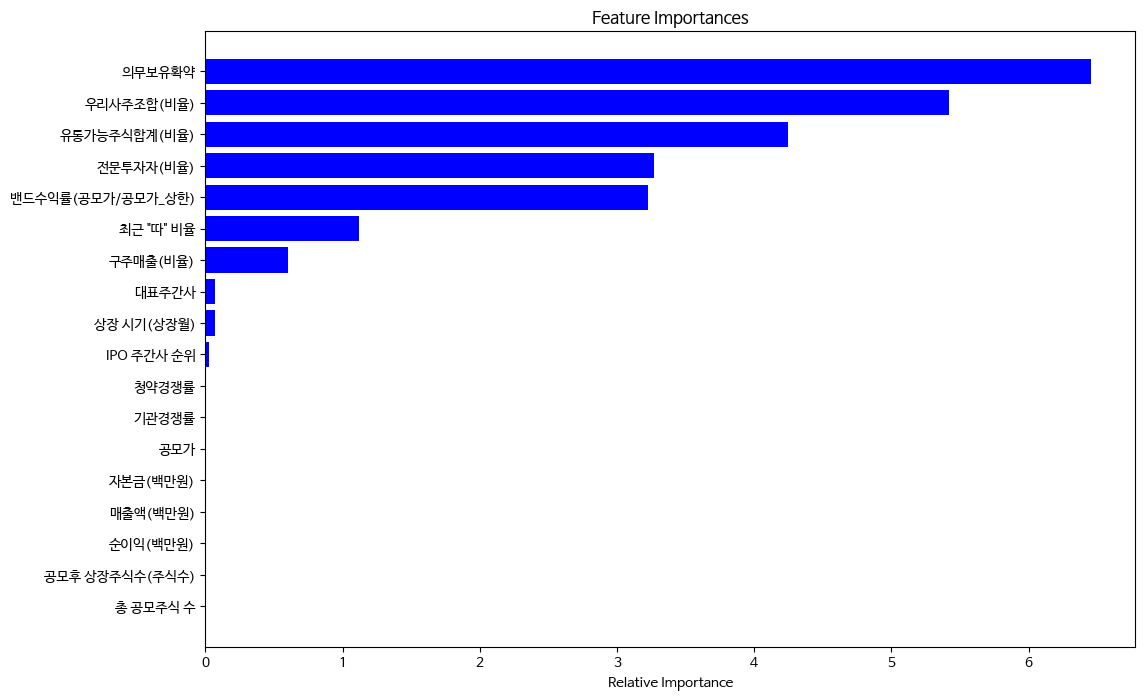

In [11]:
import matplotlib.pyplot as plt

# 각 feature의 importance
features = list(feature_importance.keys())
importances = list(feature_importance.values())

# 정렬된 중요도에 따라 feature를 정렬합니다.
indices = np.argsort(importances)

plt.figure(figsize=(12, 8))  # 그림의 크기를 설정합니다.
plt.title('Feature Importances')  # 그림의 제목을 설정합니다.
plt.barh(range(len(indices)), [importances[i] for i in indices], color='b', align='center')  # 수평 막대 그래프를 그립니다.
plt.yticks(range(len(indices)), [features[i] for i in indices])  # y축에 feature 이름을 표시합니다.
plt.xlabel('Relative Importance')  # x축의 레이블을 설정합니다.
plt.show()  # 그림을 출력합니다.


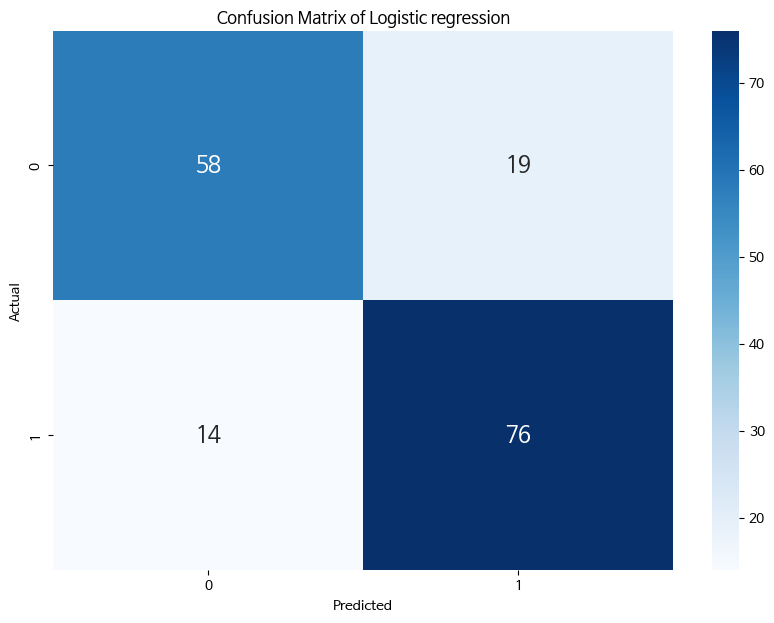

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 'model'과 'X_test'는 당신의 모델과 테스트 데이터입니다.
cm = confusion_matrix(y_test, logreg_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt=".0f", cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic regression')
plt.show()